Lesson_3. Оцінювання параметрів розподілів.
https://www.kite.com/python/answers/how-to-fit-data-to-a-distribution-in-python




In [1]:

#Завантажити Pandas

import pandas as pd
import numpy as np


In [2]:
# Приклад 1. Дані вводимо вручну.
proba=pd.Series([10,20,38,40,45,50,52,55,77,100], ['a','b','c','d','вага','e','no','yes','r','or'])
proba

a        10
b        20
c        38
d        40
вага     45
e        50
no       52
yes      55
r        77
or      100
dtype: int64

In [3]:
#завантажимо додаткові бібліотеки для графічного виведення і scipy.stats для знаходження параметрів розподілу
import matplotlib.pyplot as plot
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt


(array([0.01111111, 0.01111111, 0.        , 0.03333333, 0.02222222,
        0.01111111, 0.        , 0.01111111, 0.        , 0.01111111]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

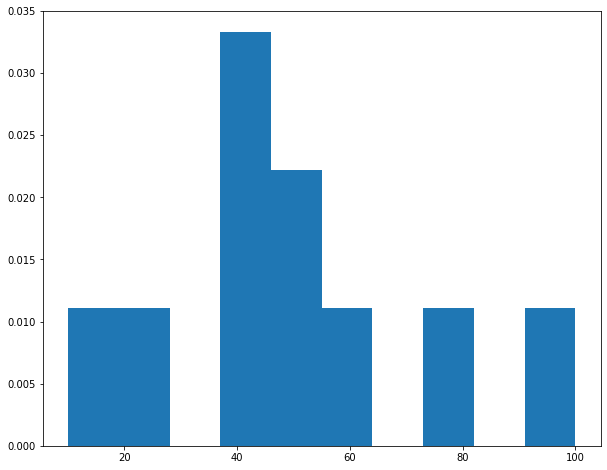

In [4]:
plt.subplots(figsize=(10,8))
plt.hist(proba, density=True)

In [5]:
# обчислюємо параметри для нормального розподілу
a, sigma  =scipy.stats.distributions.norm.fit(proba)

In [6]:
a, sigma 


(48.7, 24.51550529766825)

In [8]:
# визначаємо значення на ОХ: від 0 до 100.
ix = np.linspace(-25,125,20)

In [9]:
# обчислюємо значення теоеретичної функції розподілу для підібраних параметрів
N_fitted_proba = scipy.stats.distributions.norm.pdf(ix, a, sigma)

In [10]:
N_fitted_proba

array([0.00017741, 0.00044351, 0.00099952, 0.00203067, 0.0037192 ,
       0.00614077, 0.00914026, 0.01226467, 0.01483595, 0.01617845,
       0.01590453, 0.01409505, 0.01126094, 0.00811045, 0.00526595,
       0.00308228, 0.0016264 , 0.00077365, 0.00033176, 0.00012825])

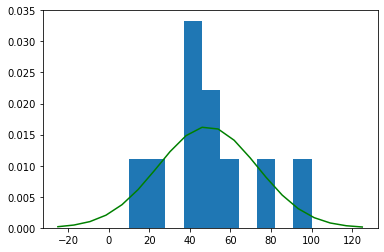

In [11]:
# будуємо на одному графіку гістограму і щільність теоретичного розподілу
plt.hist(proba, density=True)
plt.plot(ix,N_fitted_proba,'g')

Приклад 2. У якості вибірки візьмемо згенеровані нормально розподілені випадкові числа.(1000 штук)

In [13]:
data = np.random.normal(0, 0.5, 1000)

In [14]:
mean, var  =scipy.stats.distributions.norm.fit(data)

In [15]:
mean, var

(-0.014510992060420036, 0.5206514172696225)

In [16]:
x = np.linspace(-5,5,100)

In [18]:
fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

(array([0.02254187, 0.10425617, 0.33812812, 0.65371436, 0.74106412,
        0.55791139, 0.30149757, 0.07607883, 0.01972414, 0.00281773]),
 array([-1.57363156, -1.2187365 , -0.86384143, -0.50894637, -0.1540513 ,
         0.20084377,  0.55573883,  0.9106339 ,  1.26552897,  1.62042403,
         1.9753191 ]),
 <a list of 10 Patch objects>)

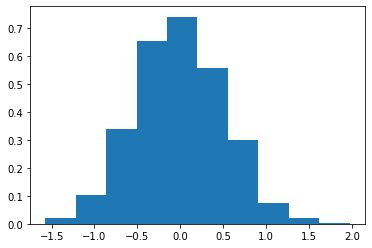

In [19]:
plt.hist(data, density=True)

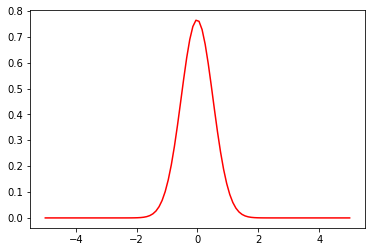

In [20]:
plt.plot(x,fitted_data,'r-')

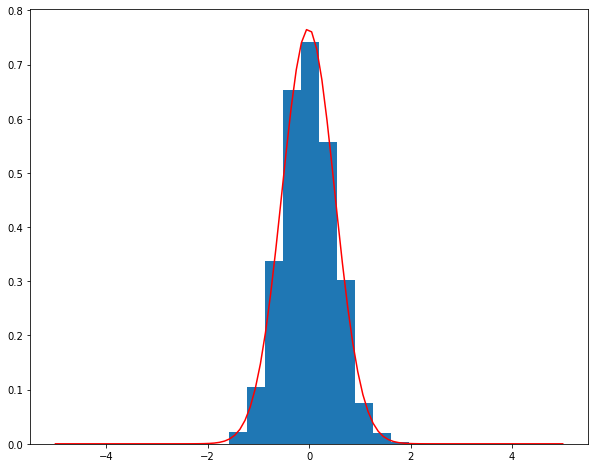

In [21]:
plt.subplots(figsize=(10,8))
plt.hist(data, density=True)
plt.plot(x,fitted_data,'r-')

In [ ]:
scipy.stats.distributions.norm.fit(proba)

(48.7, 24.51550529766825)

Приклад 3. Тепер покажемо все те саме (підбір параматрів нормального розподілу), але для якогось стовпчика із завантаженої таблиці

In [22]:
from google.colab import files
uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('titanic.csv', name)

Saving titanic.csv to titanic.csv
titanic.csv titanic.csv


In [23]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head(6)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Тепер будемо розглядати стовпчик Fare з числовими даними як обєкт Data Frame


In [24]:
F = titanic_df['Fare']

In [25]:
F.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
F.skew()

4.787316519674893

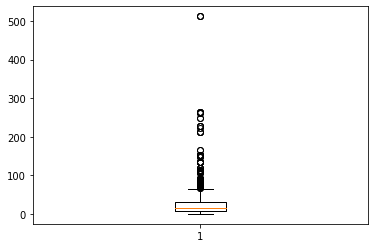

In [27]:
plot.boxplot(F)
plot.show()

(array([1.60355651e-02, 2.32209002e-03, 6.79101799e-04, 4.38130193e-05,
        2.40971606e-04, 1.31439058e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.57195289e-05]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

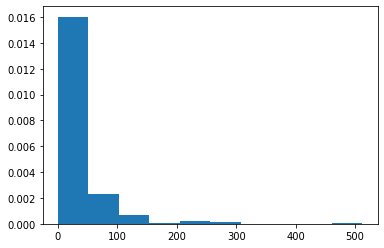

In [28]:
plt.hist(F, density=True)


In [29]:
scipy.stats.distributions.norm.fit(F)

(32.204207968574636, 49.6655344447741)

In [61]:
a, b  =scipy.stats.distributions.norm.fit(F)
a, b

(32.204207968574636, 49.6655344447741)

In [65]:
ix = np.linspace(-25,200,50)

In [66]:
fitted_F = scipy.stats.distributions.norm.pdf(ix, a, b)

In [67]:
fitted_F

array([4.13793457e-03, 4.58326510e-03, 5.03331376e-03, 5.48050648e-03,
       5.91663876e-03, 6.33311071e-03, 6.72119928e-03, 7.07235629e-03,
       7.37851827e-03, 7.63241277e-03, 7.82784483e-03, 7.95994806e-03,
       8.02538594e-03, 8.02249187e-03, 7.95133977e-03, 7.81374087e-03,
       7.61316712e-03, 7.35460562e-03, 7.04435254e-03, 6.68975852e-03,
       6.29893994e-03, 5.88047165e-03, 5.44307752e-03, 4.99533417e-03,
       4.54540137e-03, 4.10079065e-03, 3.66817988e-03, 3.25327906e-03,
       2.86074849e-03, 2.49416801e-03, 2.15605282e-03, 1.84790975e-03,
       1.57032586e-03, 1.32308113e-03, 1.10527625e-03, 9.15467356e-04,
       7.51800406e-04, 6.12138812e-04, 4.94179747e-04, 3.95555690e-04,
       3.13919285e-04, 2.47010846e-04, 1.92708875e-04, 1.49064791e-04,
       1.14323656e-04, 8.69330260e-05, 6.55422215e-05, 4.89942580e-05,
       3.63125609e-05, 2.66843260e-05])

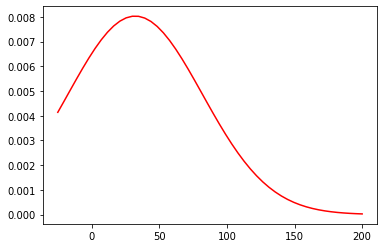

In [68]:

plt.plot(ix,fitted_F,'r-')

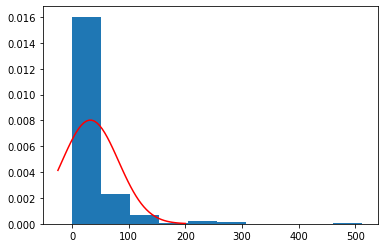

In [70]:
plt.hist(F, density=True)
plt.plot(ix,fitted_F,'r-')


Тепер все те саме, але з розподілом Стьюдента

In [71]:
# завантажуємо t (Student)
from scipy.stats import t


In [72]:
# обчислюємо параметри для Стьюдент розподілу
x, loc, scale  =scipy.stats.distributions.t.fit(proba)

In [73]:
x, loc, scale 


(8000.8884417673435, 48.698424973571875, 24.51255436383491)

In [92]:
# визначаємо значення на ОХ: від -25 до 125.
Ox = np.linspace(-25,125,10)
ix = np.linspace(-25,125,20)

In [93]:
# обчислюємо значення теоеретичної функції Student розподілу для підібраних параметрів
t_fitted_proba = scipy.stats.distributions.t.pdf(Ox, x, loc, scale)

In [94]:
t_fitted_proba

array([0.00017762, 0.00108715, 0.00419474, 0.01019839, 0.0156184 ,
       0.01506453, 0.00915154, 0.00350209, 0.0008445 , 0.00012839])

In [95]:
N_fitted_proba = scipy.stats.distributions.norm.pdf(ix, a, sigma)
N_fitted_proba

array([1.06946559e-03, 2.15271397e-03, 3.90632130e-03, 6.39015975e-03,
       9.42361620e-03, 1.25281108e-02, 1.50146669e-02, 1.62221324e-02,
       1.58001897e-02, 1.38732681e-02, 1.09813917e-02, 7.83606633e-03,
       5.04081718e-03, 2.92324968e-03, 1.52824505e-03, 7.20248236e-04,
       3.06008529e-04, 1.17205227e-04, 4.04690070e-05, 1.25968001e-05])

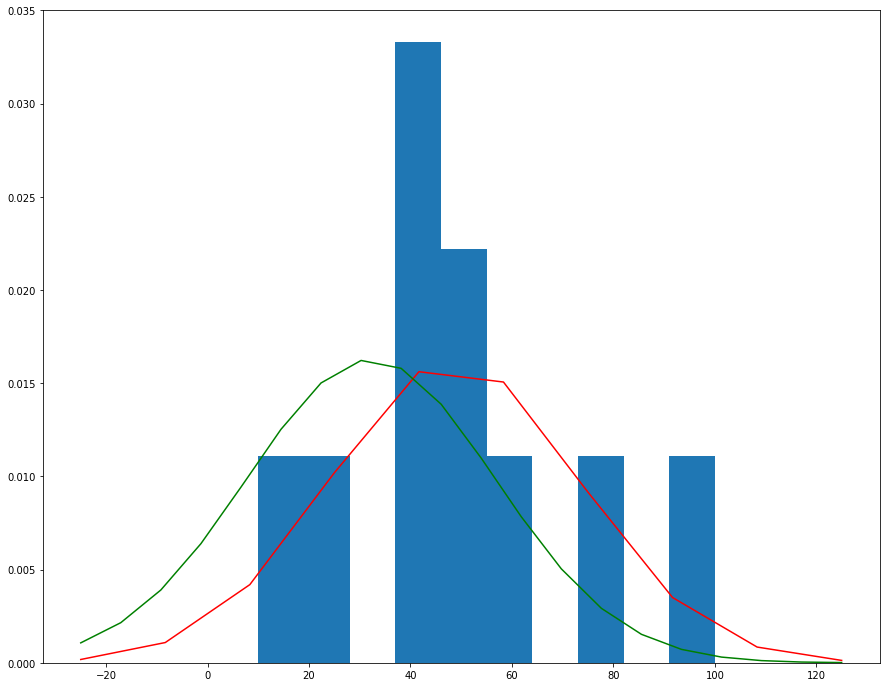

In [96]:
# будуємо на одному графіку гістограму і щільність теоретичного розподілу
plt.subplots(figsize=(15,12))
plt.hist(proba, density=True)

plt.plot(Ox,t_fitted_proba,'r')

plt.plot(ix,N_fitted_proba,'g')